<a href="https://colab.research.google.com/github/dharani897/image-steganography-using-k-means-clustering-/blob/main/image_steganography_with_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np
from PIL import Image

In [31]:
pip install pycryptodome

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
img = cv2.imread('/content/image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

<Figure size 640x480 with 0 Axes>

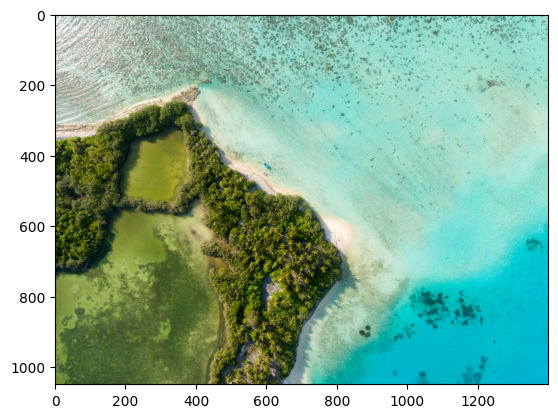

In [13]:
original_img = cv2.imread('/content/img.jpeg')
o_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.imshow(o_img)
vector_img = o_img.reshape((-1, 3))

In [14]:
vector_img = np.float32(vector_img)
vector_img.shape

(1468600, 3)

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 3
attempts = 10
ret, lable, center = cv2.kmeans(vector_img, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

(1468600, 3)


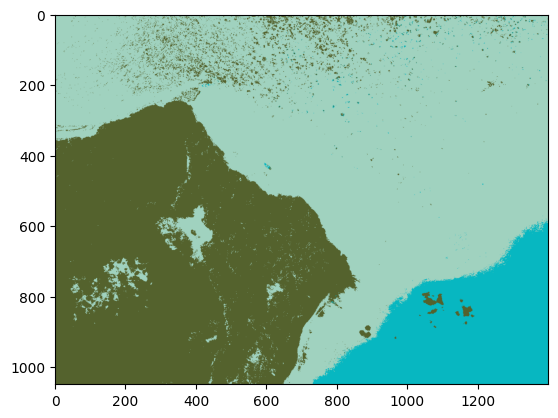

In [16]:
center = np.uint8(center)
res = center[lable.flatten()]
print(res.shape)
res_image = res.reshape((o_img.shape))
plt.imshow(res_image)
clustered_img = Image.fromarray(res_image)
clustered_img.save('/content/drive/My Drive/Colab Notebooks/clustered_img.png')

In [17]:
image_one_array = []
image_two_array = []
image_three_array = []
for i in range(0, len(lable)):
    if lable[i][0] == 0:
        image_one_array.append(vector_img[i])
    elif lable[i][0] == 1:
        image_two_array.append(vector_img[i])
    else:
        image_three_array.append(vector_img[i])

In [18]:
print(len(image_one_array), len(image_two_array), len(image_three_array))

784504 514656 169440


In [19]:
import math
len1 = len(image_one_array)
len2 = len(image_two_array)
len3 = len(image_three_array)

pad1 = math.ceil(math.sqrt(len1))**2 - len1
pad2 = math.ceil(math.sqrt(len2))**2 - len2
pad3 = math.ceil(math.sqrt(len3))**2 - len3
print(pad1, pad2, pad3)

492 868 304


In [20]:
white = np.array([255.0, 255.0, 255.0], dtype=np.float32)

In [21]:
for i in range(0, pad1):
    image_one_array.append(white)

for i in range(0, pad2):
    image_two_array.append(white)

for i in range(0, pad3):
    image_three_array.append(white)

d1 = int(math.sqrt(len(image_one_array)))
print(len(image_one_array), d1)
d2 = int(math.sqrt(len(image_two_array)))
print(len(image_two_array), d2)
d3 = int(math.sqrt(len(image_three_array)))
print(len(image_three_array), d3)

784996 886
515524 718
169744 412


In [22]:
cluster1 = np.uint8(np.array(image_one_array)).reshape((d1, d1, 3))
cluster2 = np.uint8(np.array(image_two_array)).reshape((d2, d2, 3))
cluster3 = np.uint8(np.array(image_three_array)).reshape(d3, d3, 3)

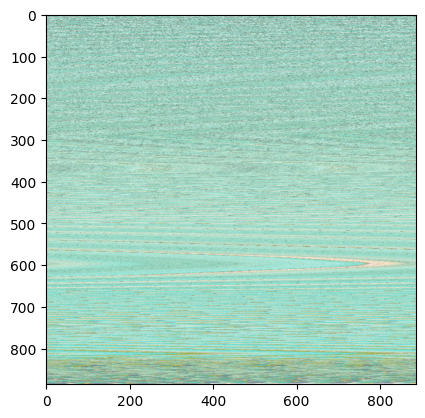

In [23]:
plt.imshow(cluster1)
cluster1_img = Image.fromarray(cluster1)
cluster1_img.save('/content/drive/My Drive/Colab Notebooks/cluster1_img.png')

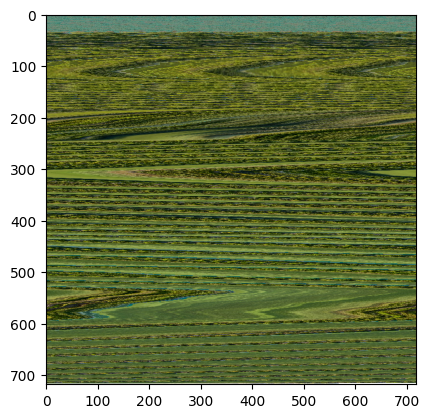

In [24]:
plt.imshow(cluster2)
cluster2_img = Image.fromarray(cluster2)
cluster2_img.save('/content/drive/My Drive/Colab Notebooks/cluster2_img.png')

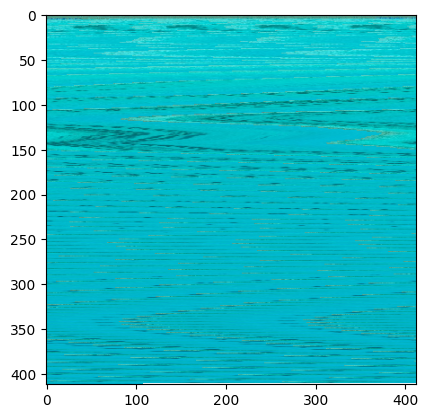

In [25]:
plt.imshow(cluster3)
cluster3_img = Image.fromarray(cluster3)
cluster3_img.save('/content/drive/My Drive/Colab Notebooks/cluster3_img.png')

In [26]:
def messageToBinary(message):
    if type(message) == str:
        return ''.join([ format(ord(i), "08b") for i in message ])
    elif type(message) == bytes: #or type(message) == np.ndarray:
        return ''.join([ format(i, "08b") for i in message ])
    elif type(message) == np.ndarray:
        return [format(i, "08b") for i in message]
    elif type(message) == int or type(message) == np.uint8:
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

In [27]:
# Function to hide the secret message into the image

def hideData(image, secret_message):

      # calculate the maximum bytes to encode
    # print("Inside the hidedata function")
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8
    # print("Maximum bytes to encode:", n_bytes)

    #Check if the number of bytes to encode is less than the maximum bytes in the image
    if len(secret_message) > n_bytes:
        raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")

    secret_message += b'#####' # you can use any string as the delimeter

    data_index = 0
    # convert input data to binary format using messageToBinary() fucntion
    binary_secret_msg = messageToBinary(secret_message)
    # print("bin sec msg:", binary_secret_msg)

    data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
    for values in image:
        for pixel in values:
            # convert RGB values to binary format
            # print("pixel:",pixel)
            # print(type(pixel))
            r, g, b = messageToBinary(pixel)
            # print("rgb:",r,g,b)
            # modify the least significant bit only if there is still data to store
            if data_index < data_len:
                # hide the data into least significant bit of red pixel
                pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # hide the data into least significant bit of green pixel
                pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # hide the data into least significant bit of  blue pixel
                pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1

            # print("new Pixel:",pixel)
            # if data is encoded, just break out of the loop
            if data_index >= data_len:
                break

    # print("outside the nested loop")
    return image

In [28]:
def showData(image):

    # print('inside showdata')
    binary_data = ""
    for values in image:
        for pixel in values:
            r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
            binary_data += r[-1] #extracting data from the least significant bit of red pixel
            binary_data += g[-1] #extracting data from the least significant bit of red pixel
            binary_data += b[-1] #extracting data from the least significant bit of red pixel
    # split by 8-bits
    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
    # convert from bits to characters
    decoded_data = b''
    for byte in all_bytes:
      try:
        decoded_data += int(byte, 2).to_bytes(len(byte) // 8, byteorder='big')#chr(int(byte, 2))
        if decoded_data[-5:] == b'#####': #check if we have reached the delimeter which is "#####"
            break
      except Exception as e:
        print(byte)
        break

    # print(decoded_data)
    return decoded_data[:-5] #remove the delimeter to show the original hidden message

In [29]:
# pip install pycryptodome
from Crypto.Cipher import AES
key = b'Sixteen byte key'
msg = input("Enter the message")
if len(msg)%16 != 0:
  msg = msg + ' '*(16-len(msg)%16)

print("Message:", msg, len(msg))
msg = msg.encode()
cipher = AES.new(key, AES.MODE_ECB)
enc_msg = cipher.encrypt(msg)

print("Encrypted message:", enc_msg)
div_len = int(math.ceil(len(enc_msg)/3))
chunk1 = enc_msg[0:div_len]
chunk2 = enc_msg[div_len: 2*div_len]
chunk3 = enc_msg[2*div_len:]
# print(enc_msg)
print("chunk1:", chunk1)
print("chunk2:", chunk2)
print("chunk3:", chunk3)


image1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster1_img.png')
image_encoded1 = hideData(image1, chunk1)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/cluster1_img_encoded.png', image_encoded1)

image2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster2_img.png')
image_encoded2 = hideData(image2, chunk2)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/cluster2_img_encoded.png', image_encoded2)

image3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster3_img.png')
image_encoded3 = hideData(image3, chunk3)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/cluster3_img_encoded.png', image_encoded3)

image_dec1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster1_img_encoded.png')
decoded_chunk1 = showData(image_dec1)
print("decoded chunk1:",decoded_chunk1)

image_dec2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster2_img_encoded.png')
decoded_chunk2 = showData(image_dec2)
print("decoded chunk2:",decoded_chunk2)

image_dec3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/cluster3_img_encoded.png')
decoded_chunk3 = showData(image_dec3)
print("decoded chunk3:",decoded_chunk3)

decoded_encrypted_msg = decoded_chunk1 + decoded_chunk2 + decoded_chunk3
print("decoded encrypted message:", decoded_encrypted_msg)

dec_msg = cipher.decrypt(decoded_encrypted_msg)
print("Decrypted Message:", dec_msg)

Enter the messagedeesha was a army writer
Message: deesha was a army writer         32
Encrypted message: b'\xfd\x87\x04\x91P\xc9\xd0FL\xe3\xd4\xf9z\x1e\xe7\xcd2\x04+o\x17\x90\x81\xb2\x17\x19\xda\xf5\xe6\xab\xbdB'
chunk1: b'\xfd\x87\x04\x91P\xc9\xd0FL\xe3\xd4'
chunk2: b'\xf9z\x1e\xe7\xcd2\x04+o\x17\x90'
chunk3: b'\x81\xb2\x17\x19\xda\xf5\xe6\xab\xbdB'
decoded chunk1: b'\xfd\x87\x04\x91P\xc9\xd0FL\xe3\xd4'
decoded chunk2: b'\xf9z\x1e\xe7\xcd2\x04+o\x17\x90'
decoded chunk3: b'\x81\xb2\x17\x19\xda\xf5\xe6\xab\xbdB'
decoded encrypted message: b'\xfd\x87\x04\x91P\xc9\xd0FL\xe3\xd4\xf9z\x1e\xe7\xcd2\x04+o\x17\x90\x81\xb2\x17\x19\xda\xf5\xe6\xab\xbdB'
Decrypted Message: b'deesha was a army writer        '
